In [1]:
import pandas as pd
import pymssql
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

In [2]:
from config import database
from config import Mouse
from config import Virus
from config import Protein
from config import Biotin
from config import Fraction
from config import Protein_Id
from config import Gene
from config import Protein_Description
from config import Peptide
from config import username
from config import password
from config import server

In [3]:
try:
    conn = pymssql.connect(server,username, password,database)

    cursor = conn.cursor()
    query = f"""
    SELECT 
        M.Sample_Name,
        P.Protein_Name,
        V.Virus_Label,
        B.Biotin_Label,
        F.Fraction_Label,
        MP.Hits
        FROM Mouse_Protein AS MP 
    INNER JOIN {Mouse} AS M on MP.Mouse_ID = M.Mouse_ID
    INNER JOIN {Protein} AS P on MP.Protein_ID = P.Protein_ID
    INNER JOIN {Virus} AS V on M.Virus_ID = V.Virus_ID
    INNER JOIN {Biotin} AS B on M.Biotin_ID = B.Biotin_ID
    INNER JOIN {Fraction} AS F on M.Fraction_ID = F.Fraction_ID
    INNER JOIN {Protein_Id} AS PI on P.Protein_Id_ID = PI.Protein_Id_ID
    INNER JOIN {Gene} AS G on P.Gene_ID = G.Gene_ID
    INNER JOIN {Protein_Description} AS PD on P.Description_ID = PD.Description_ID
    INNER JOIN {Peptide} AS PE on P.Peptide_ID = PE.Peptide_ID
    WHERE M.Sample_Name != 'Q331K_M1' AND M.Sample_Name != 'Q331K_M2' AND M.Sample_Name != 'WT_M3' AND M.Sample_Name != 'WT_M4'
    ORDER BY MP.Hits DESC
    """
    main_df = pd.read_sql(query, conn)
except Exception as e:
    print(e)
main_df.head()

,Sample_Name,Protein_Name,Virus_Label,Biotin_Label,Fraction_Label,Hits
0,3062-MRU-LP1_11,NFH_MOUSE,TDP43-TurboID,72,LP1,5.225510e+09
1,3062-MRU-LP1_11,NFL_MOUSE,TDP43-TurboID,72,LP1,4.174620e+09
2,3062-MRU-LP1_11,H2A1B_MOUSE;H2A1C_MOUSE;H2A1D_MOUSE;H2A1E_MOUS...,TDP43-TurboID,72,LP1,3.127040e+09
3,3062-MRU-LP1_11,TBA1A_MOUSE,TDP43-TurboID,72,LP1,3.018330e+09
4,3062-MRU-LP1_11,PLEC-6_MOUSE;PLEC-7_MOUSE;PLEC-8_MOUSE,TDP43-TurboID,72,LP1,2.856640e+09


In [4]:
print("Virus types:", list(main_df["Virus_Label"].unique()))
print("Biotin types:", list(main_df["Biotin_Label"].unique()))
print("Fraction types:", list(main_df["Fraction_Label"].unique()))
print("Total rows of data:", len(main_df), "\nWith 24 data frame combos")

Virus types: ['TDP43-TurboID', 'TurboID']
Biotin types: ['72', '1.5', 'saline']
Fraction types: ['LP1', 'LS1', 'whole brain', 'Nuclear']
Total rows of data: 115317 
With 24 data frame combos


In [5]:
def labeler(word):
    word_list = word.split("_")
    labels = ["Virus:", "Biotin:", "Fraction:", "Sample:"]
    result = ''
    for i in range(len(word_list)):
        if(word_list[i] == "15" or word_list[i] == 15): word_list[i] = "1.5"
        if(i != (len(word_list) - 1)):
            result += labels[i] + ' ' + word_list[i] + '\n'
        else:
            result += labels[i] + ' ' + word_list[i]
    return result

# Protein Sets too look into

---
## Sample, Virus, Biotin, Brain Fraction
#### 1135-MRL_12, TurboID, 72, whole brain
#### 3058-FRU_13, TurboID, 72, whole brain
#### 1139, TurboID, 72, whole brain
#### 3058-MRU_15, TDP43-TurboID, 72, whole brain
#### 3062-MRU_14, TDP43-TurboID, 72, whole brain
#### 3058, TDP43-TurboID, 72, whole brain


In [6]:
TurboID_72_wholebrain_1135MRL12 = main_df[main_df["Sample_Name"] == "1135-MRL_12"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TurboID_72_wholebrain_3058FRU13 = main_df[main_df["Sample_Name"] == "3058-FRU_13"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TurboID_72_wholebrain_1139 = main_df[main_df["Sample_Name"] == "1139"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TDP43TurboID_72_wholebrain_3058MRU15 = main_df[main_df["Sample_Name"] == "3058-MRU_15"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TDP43TurboID_72_wholebrain_3062MRU14 = main_df[main_df["Sample_Name"] == "3062-MRU_14"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TDP43TurboID_72_wholebrain_3058 = main_df[main_df["Sample_Name"] == "3058"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

print(f"Check that all subsets have information\n1:{len(TurboID_72_wholebrain_1135MRL12)}, 2:{len(TurboID_72_wholebrain_3058FRU13)}, 3:{len(TurboID_72_wholebrain_1139)}, 4:{len(TDP43TurboID_72_wholebrain_3058MRU15)}, 5:{len(TDP43TurboID_72_wholebrain_3062MRU14)}, 6:{len(TDP43TurboID_72_wholebrain_3058)}")

C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\176044576.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_wholebrain_1135MRL12 = main_df[main_df["Sample_Name"] == "1135-MRL_12"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\176044576.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_wholebrain_3058FRU13 = main_df[main_df["Sample_Name"] == "3058-FRU_13"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\176044576.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_wholebrain_1139 = main_df[main_df["Sample_Name"] == "1139"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fracti

Check that all subsets have information
1:5883, 2:5883, 3:13536, 4:5883, 5:5883, 6:13536


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\176044576.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_72_wholebrain_3062MRU14 = main_df[main_df["Sample_Name"] == "3062-MRU_14"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\176044576.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_72_wholebrain_3058 = main_df[main_df["Sample_Name"] == "3058"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]


## Cluster Heat Map

Nummber of Proteins captured: 44


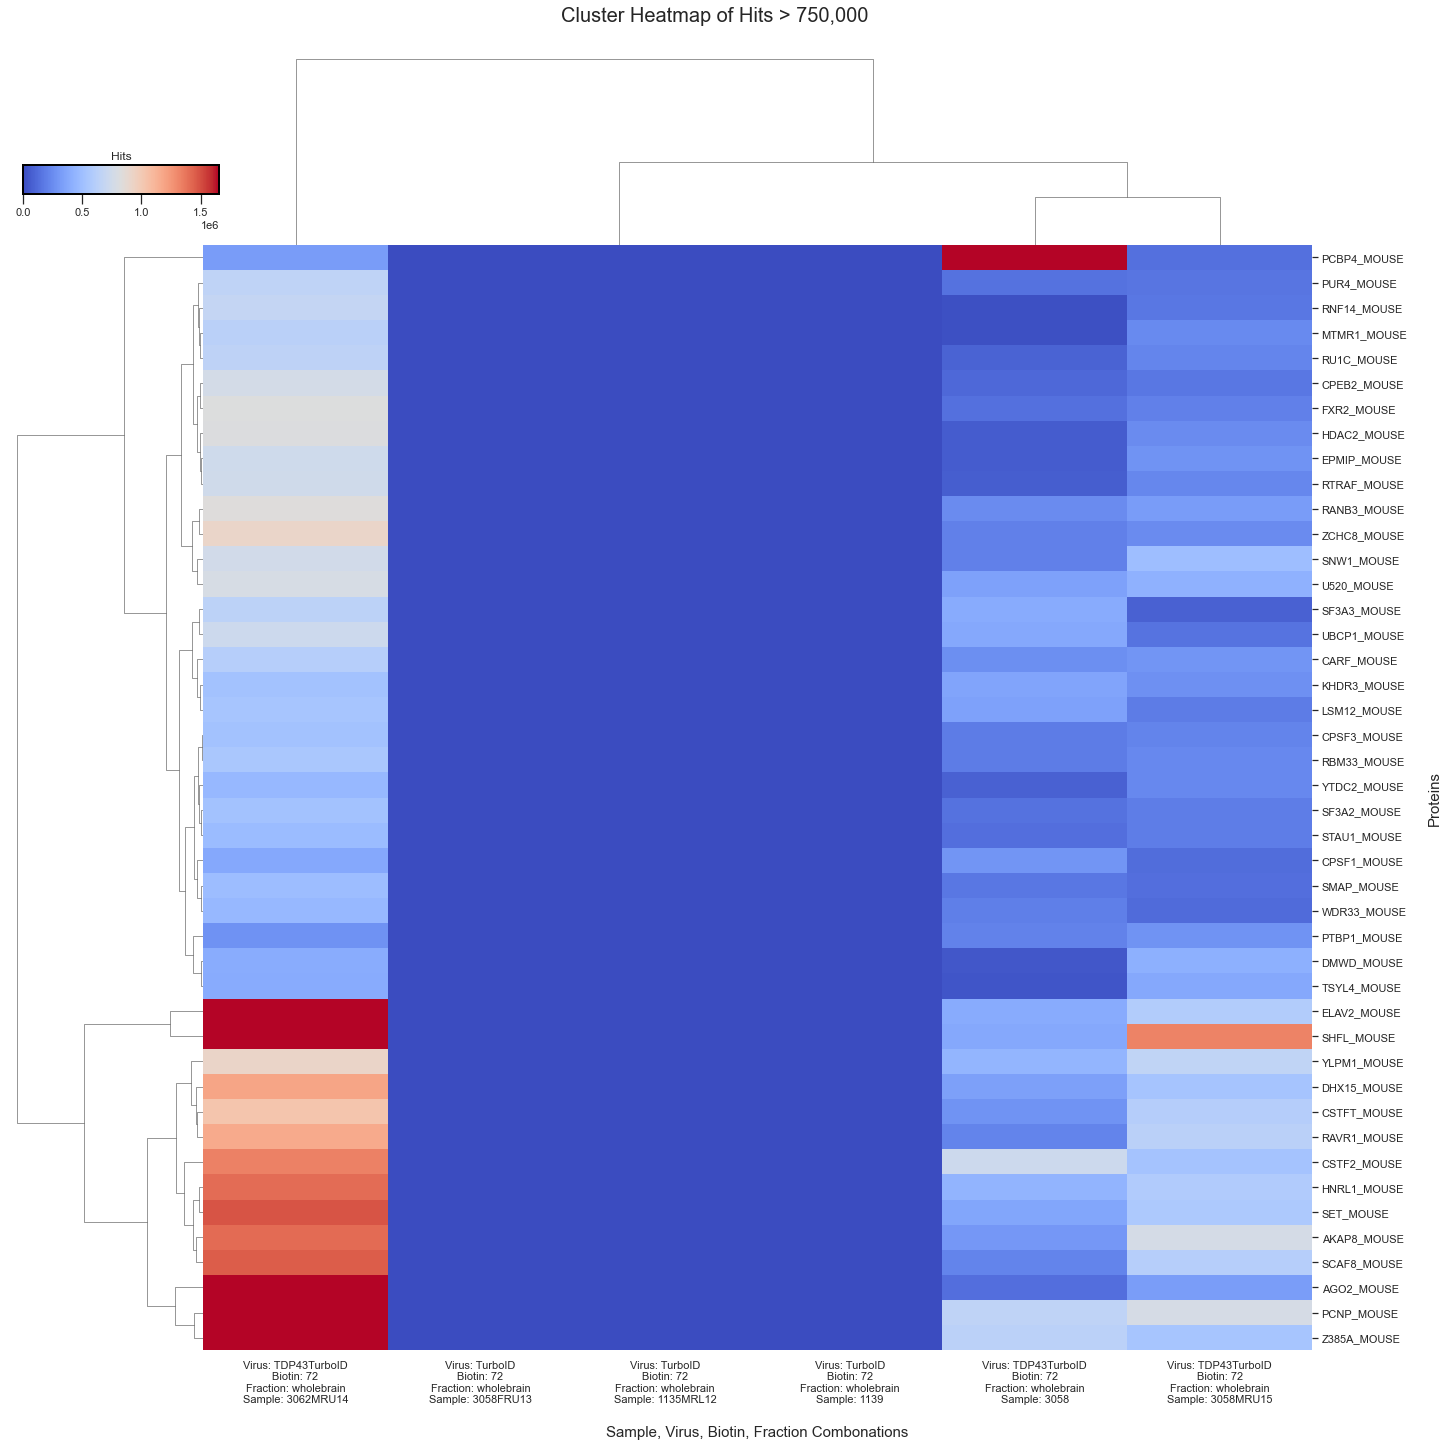

In [7]:
TurboID_72_wholebrain_1135MRL12 = TurboID_72_wholebrain_1135MRL12.copy().groupby("Protein_Name").mean().reset_index()
TurboID_72_wholebrain_3058FRU13 = TurboID_72_wholebrain_3058FRU13.copy().groupby("Protein_Name").mean().reset_index()
TurboID_72_wholebrain_1139 = TurboID_72_wholebrain_1139.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_72_wholebrain_3058MRU15 = TDP43TurboID_72_wholebrain_3058MRU15.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_72_wholebrain_3062MRU14 = TDP43TurboID_72_wholebrain_3062MRU14.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_72_wholebrain_3058 = TDP43TurboID_72_wholebrain_3058.copy().groupby("Protein_Name").mean().reset_index()

# remove non  unique proteins
def protein_finder(df):
    protein_keeper = []
    protein_list = df.Protein_Name.to_list()
    Hit_list = df.Hits.to_list()
    for i in range(len(protein_list)):
        if(Hit_list[i] != 0):
            protein_keeper.append(protein_list[i])
    return protein_keeper

protein_TurboID = list(set(protein_finder(TurboID_72_wholebrain_1135MRL12) + protein_finder(TurboID_72_wholebrain_3058FRU13) + protein_finder(TurboID_72_wholebrain_1139)))
protein_TDP43TurboID = list(set(protein_finder(TDP43TurboID_72_wholebrain_3058MRU15) + protein_finder(TDP43TurboID_72_wholebrain_3062MRU14) + protein_finder(TDP43TurboID_72_wholebrain_3058)))
proteins_non_unique = protein_TurboID + protein_TDP43TurboID
proteins_non_unique_remove = list(set([x for x in proteins_non_unique if proteins_non_unique.count(x) > 1]))

TurboID_72_wholebrain_1135MRL12 = TurboID_72_wholebrain_1135MRL12.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_wholebrain_1135MRL12")})
TurboID_72_wholebrain_3058FRU13 = TurboID_72_wholebrain_3058FRU13.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_wholebrain_3058FRU13")})
TurboID_72_wholebrain_1139 = TurboID_72_wholebrain_1139.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_wholebrain_1139")})
TDP43TurboID_72_wholebrain_3058MRU15 = TDP43TurboID_72_wholebrain_3058MRU15.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_72_wholebrain_3058MRU15")})
TDP43TurboID_72_wholebrain_3062MRU14 = TDP43TurboID_72_wholebrain_3062MRU14.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_72_wholebrain_3062MRU14")})
TDP43TurboID_72_wholebrain_3058 = TDP43TurboID_72_wholebrain_3058.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_72_wholebrain_3058")})

merge_df = TurboID_72_wholebrain_1135MRL12.merge(TurboID_72_wholebrain_3058FRU13, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TurboID_72_wholebrain_1139, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_72_wholebrain_3058MRU15, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_72_wholebrain_3062MRU14, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_72_wholebrain_3058, how = "inner", on = "Protein_Name")

# remove non unqiue proteins 
# and remove unwanted proteins
protein_list = merge_df.Protein_Name.to_list()
remove_list = []
for i in range(len(protein_list)):
    if(protein_list[i] in proteins_non_unique_remove):
        remove_list.append(i)
    else:
        if(protein_list[i][0:3].upper() == "KRT"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ACTB"):
            remove_list.append(i)
        if(protein_list[i][0:6].upper() == "SERPIN"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ITIH"):
            remove_list.append(i)
        if(protein_list[i][0:3].upper() == "ALB"):
            remove_list.append(i)
    
merge_df = merge_df.drop(remove_list, axis = 0)

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')


 # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Chagne the limit to find different visuals
limit = 750_000

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]

x_labels_order = sorted(merge_filtered_df.columns)

print("Nummber of Proteins captured:", len(merge_filtered_df))
sns.set_theme(style='white')

kws = dict(cbar_kws=dict(ticks=[x for x in range(0, 10000000, 500000)], orientation='horizontal'), figsize=(20,20))

# Default plot
g = sns.clustermap(merge_filtered_df.reindex(x_labels_order, axis = 1), cmap='coolwarm',dendrogram_ratio = (0.15, 0.15), metric="euclidean", method = "ward",  **kws, robust = True)

g.fig.subplots_adjust( top = 0.95 )
g.fig.suptitle(f'Cluster Heatmap of Hits > {limit:,}', size = 20)
g.ax_heatmap.set_xlabel('\nSample, Virus, Biotin, Fraction Combonations', size = 15)
g.ax_heatmap.set_ylabel('\nProteins', size = 15)



x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.85, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('Hits')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Show the graph
plt.show()

---
## Sample, Virus, Biotin, Brain Fraction
#### common proteins, TDP43-TurboID, 72, whole brain
#### 3062-MRL_4, TDP43-TurboID, 1.5, whole brain
#### common proteins, TurboID, 72, whole brain
#### 3058-FRL_5, TurboID, 1.5, whole brain


In [8]:
TDP43TurboID_72_wholebrain_common = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TDP43TurboID_15_wholebrain_3062MRL4 = main_df[main_df["Sample_Name"] == "3062-MRL_4"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]

TurboID_72_wholebrain_common = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]

TurboID_72_wholebrain_3058FRL5 = main_df[main_df["Sample_Name"] == "3058-FRL_5"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]

print(f"Check that all subsets have information\n1:{len(TDP43TurboID_72_wholebrain_common)}, 2:{len(TDP43TurboID_15_wholebrain_3062MRL4)}, 3:{len(TurboID_72_wholebrain_common)}, 4:{len(TurboID_72_wholebrain_3058FRL5)}")

Check that all subsets have information
1:25302, 2:5883, 3:25302, 4:5883


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3986305457.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_72_wholebrain_common = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3986305457.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_wholebrain_3062MRL4 = main_df[main_df["Sample_Name"] == "3062-MRL_4"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3986305457.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_wholebrain_common = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\Ap

## Cluster Heat Map

3760
Nummber of Proteins captured: 46


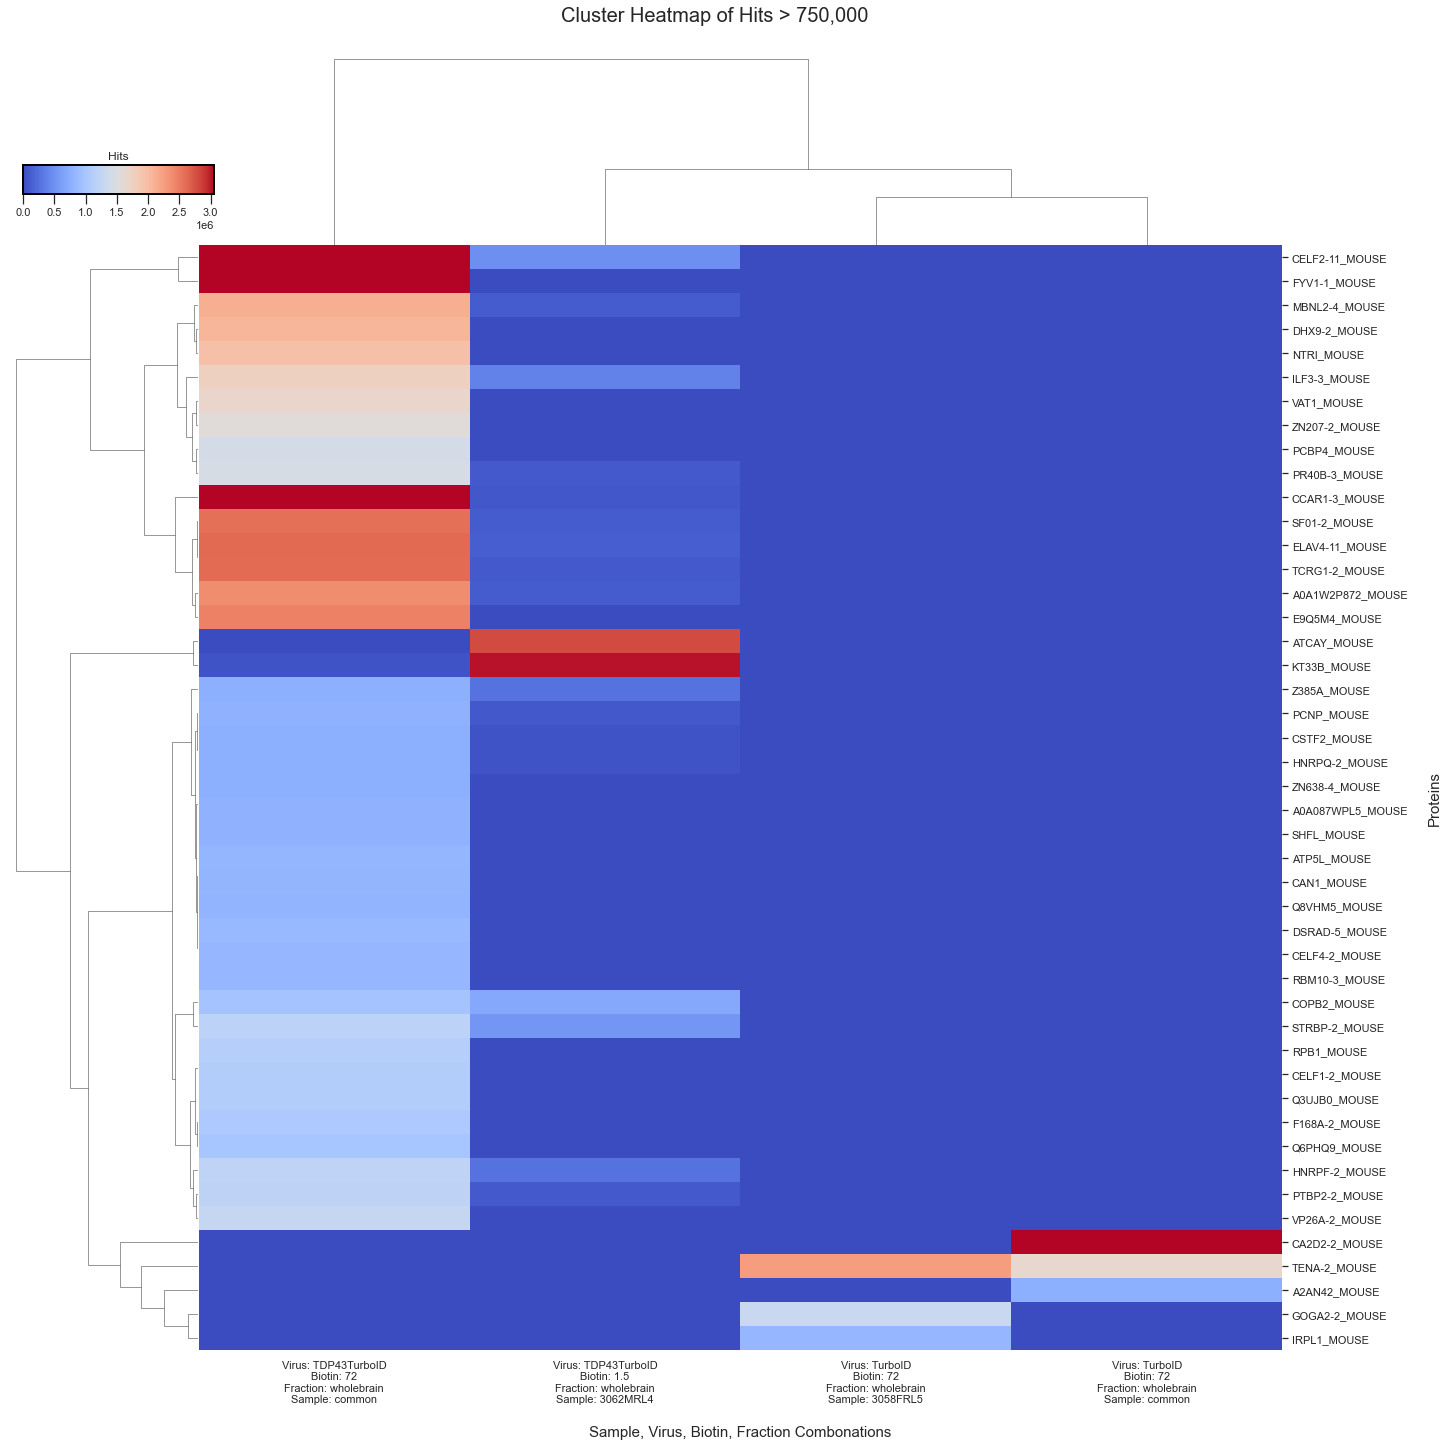

In [9]:
TDP43TurboID_72_wholebrain_common = TDP43TurboID_72_wholebrain_common.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_15_wholebrain_3062MRL4 = TDP43TurboID_15_wholebrain_3062MRL4.copy().groupby("Protein_Name").mean().reset_index()
TurboID_72_wholebrain_common = TurboID_72_wholebrain_common.copy().groupby("Protein_Name").mean().reset_index()
TurboID_72_wholebrain_3058FRL5 = TurboID_72_wholebrain_3058FRL5.copy().groupby("Protein_Name").mean().reset_index()

# remove non  unique proteins
protein_TurboID = list(set(protein_finder(TurboID_72_wholebrain_common) + protein_finder(TurboID_72_wholebrain_3058FRL5)))
protein_TDP43TurboID = list(set(protein_finder(TDP43TurboID_72_wholebrain_common) + protein_finder(TDP43TurboID_15_wholebrain_3062MRL4)))
proteins_non_unique = protein_TurboID + protein_TDP43TurboID
proteins_non_unique_remove = list(set([x for x in proteins_non_unique if proteins_non_unique.count(x) > 1]))

TDP43TurboID_72_wholebrain_common = TDP43TurboID_72_wholebrain_common.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_72_wholebrain_common")})
TDP43TurboID_15_wholebrain_3062MRL4 = TDP43TurboID_15_wholebrain_3062MRL4.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_wholebrain_3062MRL4")})
TurboID_72_wholebrain_common = TurboID_72_wholebrain_common.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_wholebrain_common")})
TurboID_72_wholebrain_3058FRL5 = TurboID_72_wholebrain_3058FRL5.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_wholebrain_3058FRL5")})

merge_df = TDP43TurboID_72_wholebrain_common.merge(TDP43TurboID_15_wholebrain_3062MRL4, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TurboID_72_wholebrain_common, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TurboID_72_wholebrain_3058FRL5, how = "inner", on = "Protein_Name")

# remove non unqiue proteins 
# and remove unwanted proteins
protein_list = merge_df.Protein_Name.to_list()
remove_list = []
for i in range(len(protein_list)):
    if(protein_list[i] in proteins_non_unique_remove):
        remove_list.append(i)
    else:
        if(protein_list[i][0:3].upper() == "KRT"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ACTB"):
            remove_list.append(i)
        if(protein_list[i][0:6].upper() == "SERPIN"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ITIH"):
            remove_list.append(i)
        if(protein_list[i][0:3].upper() == "ALB"):
            remove_list.append(i)
    
merge_df = merge_df.drop(remove_list, axis = 0)

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')
print(len(merge_df))

 # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Chagne the limit to find different visuals
limit = 750_000

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]

x_labels_order = sorted(merge_filtered_df.columns)

print("Nummber of Proteins captured:", len(merge_filtered_df))
sns.set_theme(style='white')

kws = dict(cbar_kws=dict(ticks=[x for x in range(0, 10000000, 500000)], orientation='horizontal'), figsize=(20,20))

# Default plot
g = sns.clustermap(merge_filtered_df.reindex(x_labels_order, axis = 1), cmap='coolwarm',dendrogram_ratio = (0.15, 0.15), metric="euclidean", method = "ward",  **kws, robust = True)

g.fig.subplots_adjust( top = 0.95 )
g.fig.suptitle(f'Cluster Heatmap of Hits > {limit:,}', size = 20)
g.ax_heatmap.set_xlabel('\nSample, Virus, Biotin, Fraction Combonations', size = 15)
g.ax_heatmap.set_ylabel('\nProteins', size = 15)


x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.85, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('Hits')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Show the graph
plt.show()

---
## Sample, Virus, Biotin, Brain Fraction
#### 3062-MRL_4, TDP43-TurboID, 1.5, whole brain
#### 3058-FRL_5, TurboID, 1.5, whole brain


In [10]:
TDP43TurboID_15_wholebrain_3062MRL4 = main_df[main_df["Sample_Name"] == "3062-MRL_4"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]

TurboID_15_wholebrain_3058FRL5 = main_df[main_df["Sample_Name"] == "3058-FRL_5"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]

print(f"Check that all subsets have information\n1:{len(TDP43TurboID_15_wholebrain_3062MRL4)}, 2:{len(TurboID_15_wholebrain_3058FRL5)}")

Check that all subsets have information
1:5883, 2:5883


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3741472639.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_wholebrain_3062MRL4 = main_df[main_df["Sample_Name"] == "3062-MRL_4"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3741472639.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_15_wholebrain_3058FRL5 = main_df[main_df["Sample_Name"] == "3058-FRL_5"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]


## Cluster Heat Map

5237
Nummber of Proteins captured: 37


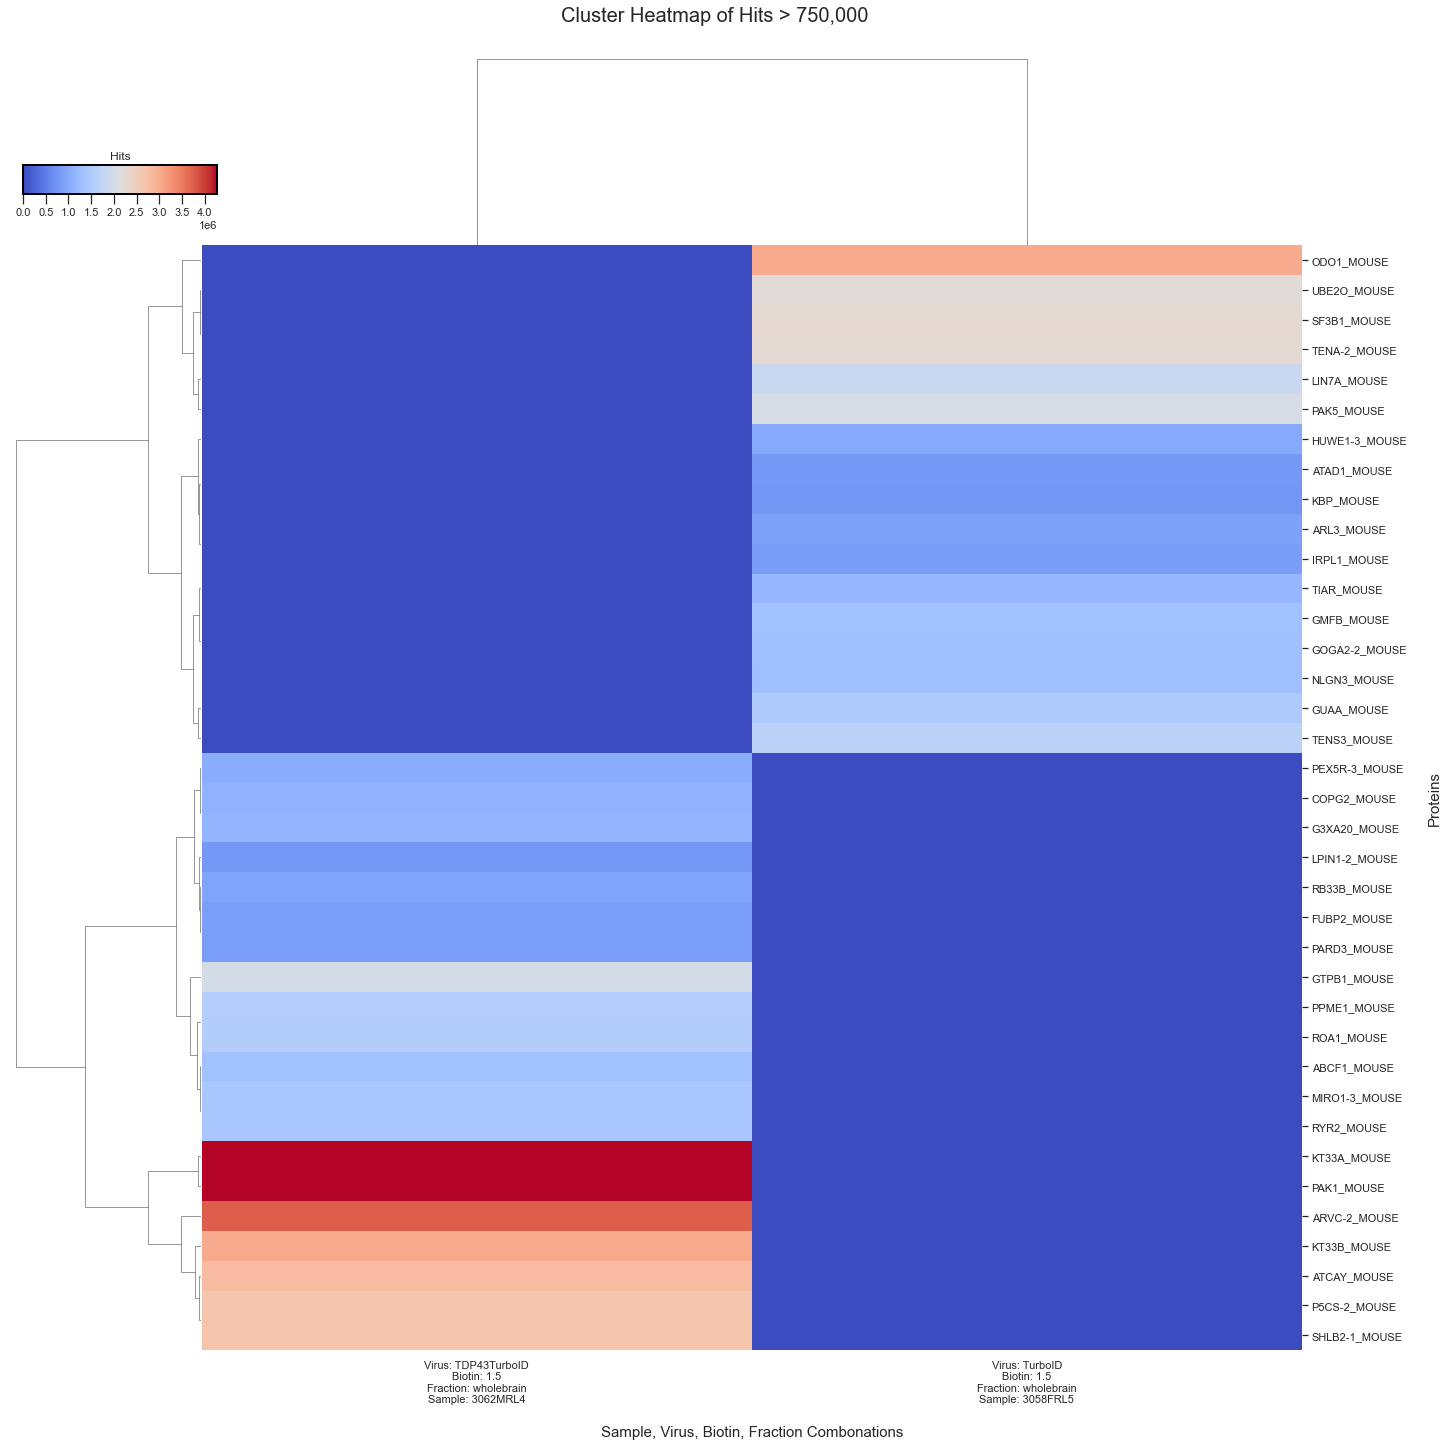

In [11]:
TDP43TurboID_15_wholebrain_3062MRL4 = TDP43TurboID_15_wholebrain_3062MRL4.copy().groupby("Protein_Name").mean().reset_index()
TurboID_15_wholebrain_3058FRL5 = TurboID_15_wholebrain_3058FRL5.copy().groupby("Protein_Name").mean().reset_index()

protein_TurboID = list(set(protein_finder(TurboID_15_wholebrain_3058FRL5)))
protein_TDP43TurboID = list(set(protein_finder(TDP43TurboID_15_wholebrain_3062MRL4)))
proteins_non_unique = protein_TurboID + protein_TDP43TurboID
proteins_non_unique_remove = list(set([x for x in proteins_non_unique if proteins_non_unique.count(x) > 1]))

TDP43TurboID_15_wholebrain_3062MRL4 = TDP43TurboID_15_wholebrain_3062MRL4.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_wholebrain_3062MRL4")})
TurboID_15_wholebrain_3058FRL5 = TurboID_15_wholebrain_3058FRL5.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_15_wholebrain_3058FRL5")})

merge_df = TDP43TurboID_15_wholebrain_3062MRL4.merge(TurboID_15_wholebrain_3058FRL5, how = "inner", on = "Protein_Name")

# remove non unqiue proteins 
# and remove unwanted proteins
protein_list = merge_df.Protein_Name.to_list()
remove_list = []
for i in range(len(protein_list)):
    if(protein_list[i] in proteins_non_unique_remove):
        remove_list.append(i)
    else:
        if(protein_list[i][0:3].upper() == "KRT"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ACTB"):
            remove_list.append(i)
        if(protein_list[i][0:6].upper() == "SERPIN"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ITIH"):
            remove_list.append(i)
        if(protein_list[i][0:3].upper() == "ALB"):
            remove_list.append(i)
    
merge_df = merge_df.drop(remove_list, axis = 0)

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')
print(len(merge_df))

 # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Chagne the limit to find different visuals
limit = 750_000

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]

x_labels_order = sorted(merge_filtered_df.columns)

print("Nummber of Proteins captured:", len(merge_filtered_df))
sns.set_theme(style='white')

kws = dict(cbar_kws=dict(ticks=[x for x in range(0, 10000000, 500000)], orientation='horizontal'), figsize=(20,20))

# Default plot
g = sns.clustermap(merge_filtered_df.reindex(x_labels_order, axis = 1), cmap='coolwarm',dendrogram_ratio = (0.15, 0.15), metric="euclidean", method = "ward",  **kws, robust = True)

g.fig.subplots_adjust( top = 0.95 )
g.fig.suptitle(f'Cluster Heatmap of Hits > {limit:,}', size = 20)
g.ax_heatmap.set_xlabel('\nSample, Virus, Biotin, Fraction Combonations', size = 15)
g.ax_heatmap.set_ylabel('\nProteins', size = 15)



x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.85, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('Hits')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Show the graph
plt.show()

---
## Sample, Virus, Biotin, Brain Fraction
#### 3062-MRU-LS1_8, TDP43-TurboID, 72, LS1
#### 3057-MLL-LS1_1, TDP43-TurboID, 1.5, LS1
#### 3057-MRL-LS1_7, TDP43-TurboID, saline,LS1
#### 3058-FRU-LS1_6, TurboID, 72, LS1


In [12]:
TDP43TurboID_72_LS1_3062MRULS18 = main_df[main_df["Sample_Name"] == "3062-MRU-LS1_8"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]

TDP43TurboID_15_LS1_3057MLLLS11 = main_df[main_df["Sample_Name"] == "3057-MLL-LS1_1"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]

TDP43TurboID_saline_LS1_3057MRLLS17 = main_df[main_df["Sample_Name"] == "3057-MRL-LS1_7"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]

TurboID_72_LS1_3058FRULS16 = main_df[main_df["Sample_Name"] == "3058-FRU-LS1_6"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]

print(f"Check that all subsets have information\n1:{len(TDP43TurboID_72_LS1_3062MRULS18)}, 2:{len(TDP43TurboID_15_LS1_3057MLLLS11)}, 3:{len(TDP43TurboID_saline_LS1_3057MRLLS17)}, 4:{len(TurboID_72_LS1_3058FRULS16)}")

Check that all subsets have information
1:5883, 2:5883, 3:5883, 4:5883


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\811058365.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_72_LS1_3062MRULS18 = main_df[main_df["Sample_Name"] == "3062-MRU-LS1_8"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\811058365.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_LS1_3057MLLLS11 = main_df[main_df["Sample_Name"] == "3057-MLL-LS1_1"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\811058365.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_LS1_3057MRLLS17 = main_df[main_df["Sample_Name"] == "3057-MRL-LS1_7"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Labe

## Cluster Heat Map

5435
Nummber of Proteins captured: 45


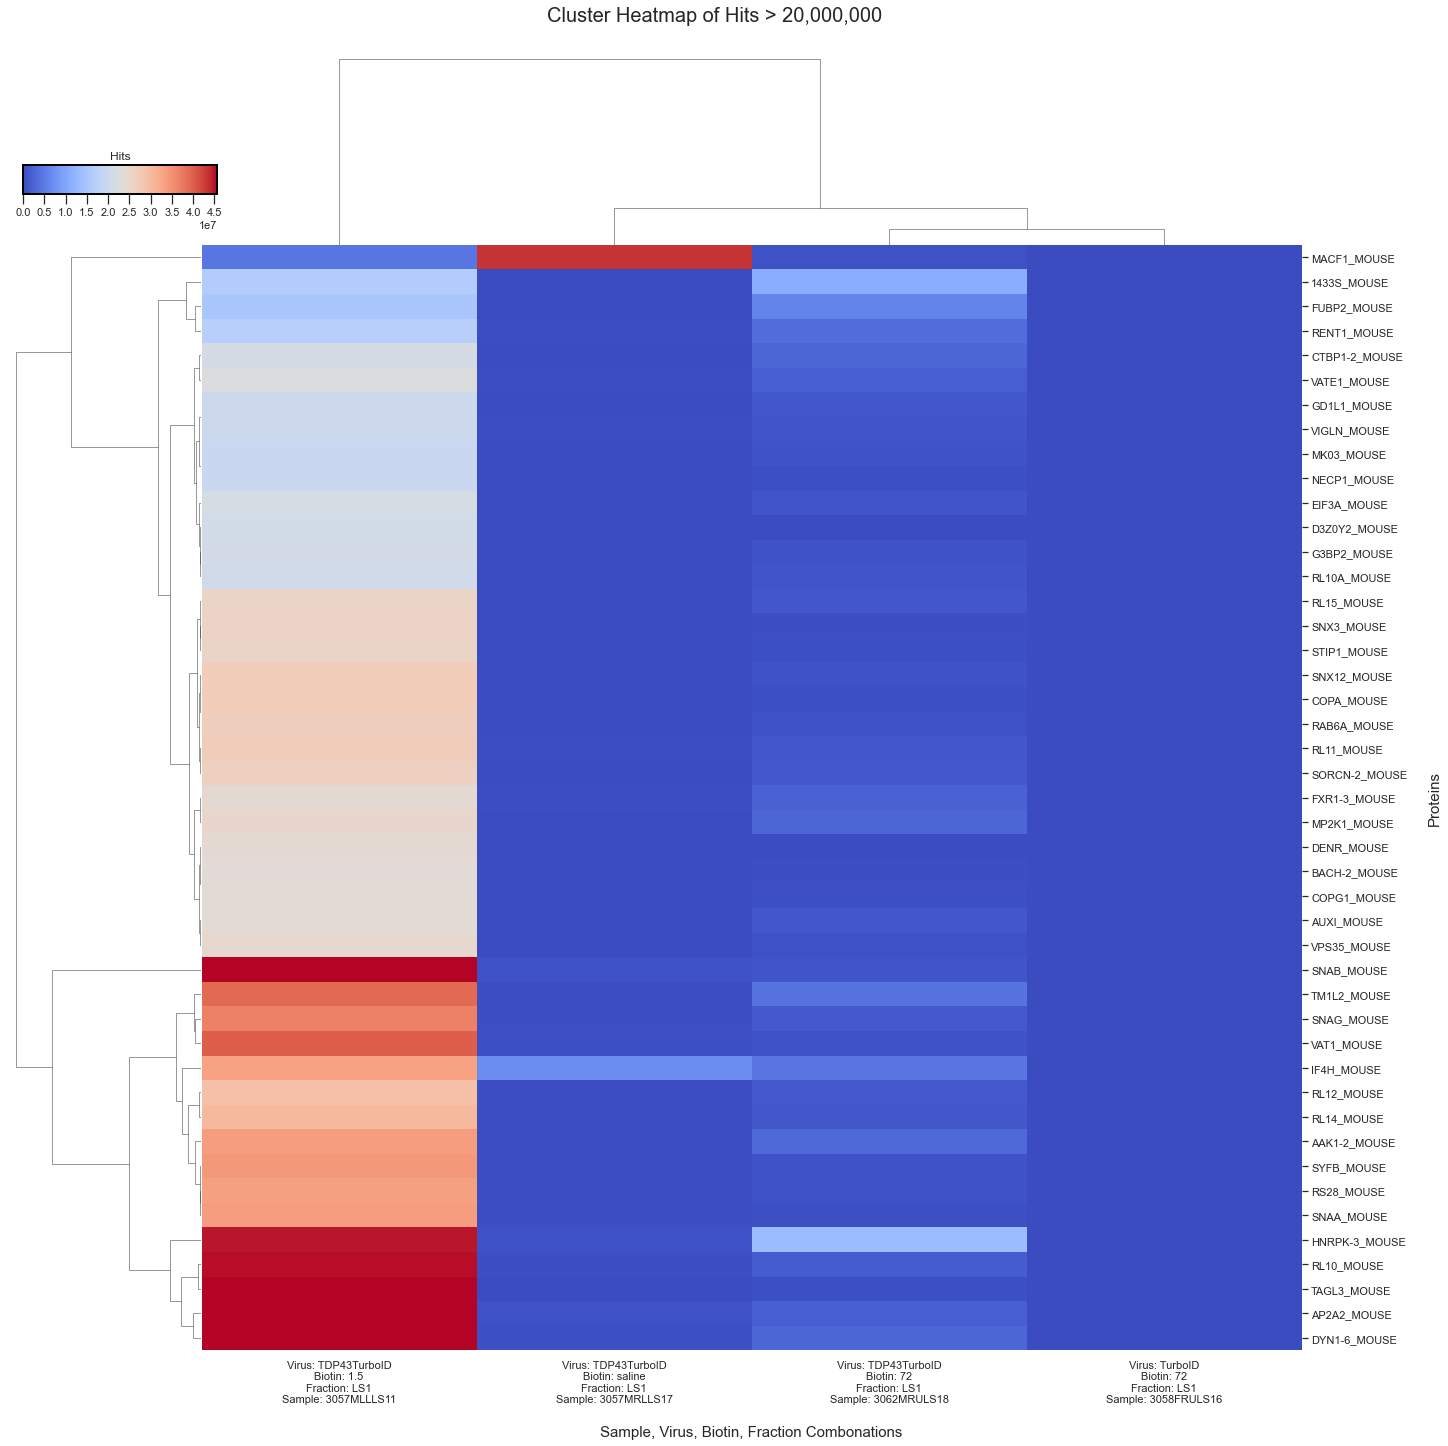

In [13]:
TDP43TurboID_72_LS1_3062MRULS18 = TDP43TurboID_72_LS1_3062MRULS18.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_15_LS1_3057MLLLS11 = TDP43TurboID_15_LS1_3057MLLLS11.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_saline_LS1_3057MRLLS17 = TDP43TurboID_saline_LS1_3057MRLLS17.copy().groupby("Protein_Name").mean().reset_index()
TurboID_72_LS1_3058FRULS16 = TurboID_72_LS1_3058FRULS16.copy().groupby("Protein_Name").mean().reset_index()

# remove non  unique proteins
protein_TurboID = list(set(protein_finder(TurboID_72_LS1_3058FRULS16)))
protein_TDP43TurboID = list(set(protein_finder(TDP43TurboID_72_LS1_3062MRULS18) + protein_finder(TDP43TurboID_15_LS1_3057MLLLS11) + protein_finder(TDP43TurboID_saline_LS1_3057MRLLS17)))
proteins_non_unique = protein_TurboID + protein_TDP43TurboID
proteins_non_unique_remove = list(set([x for x in proteins_non_unique if proteins_non_unique.count(x) > 1]))

TDP43TurboID_72_LS1_3062MRULS18 = TDP43TurboID_72_LS1_3062MRULS18.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_72_LS1_3062MRULS18")})
TDP43TurboID_15_LS1_3057MLLLS11 = TDP43TurboID_15_LS1_3057MLLLS11.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_LS1_3057MLLLS11")})
TDP43TurboID_saline_LS1_3057MRLLS17 = TDP43TurboID_saline_LS1_3057MRLLS17.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_saline_LS1_3057MRLLS17")})
TurboID_72_LS1_3058FRULS16 = TurboID_72_LS1_3058FRULS16.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_LS1_3058FRULS16")})

merge_df = TDP43TurboID_72_LS1_3062MRULS18.merge(TDP43TurboID_15_LS1_3057MLLLS11, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_saline_LS1_3057MRLLS17, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TurboID_72_LS1_3058FRULS16, how = "inner", on = "Protein_Name")

# remove non unqiue proteins 
# and remove unwanted proteins
protein_list = merge_df.Protein_Name.to_list()
remove_list = []
for i in range(len(protein_list)):
    if(protein_list[i] in proteins_non_unique_remove):
        remove_list.append(i)
    else:
        if(protein_list[i][0:3].upper() == "KRT"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ACTB"):
            remove_list.append(i)
        if(protein_list[i][0:6].upper() == "SERPIN"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ITIH"):
            remove_list.append(i)
        if(protein_list[i][0:3].upper() == "ALB"):
            remove_list.append(i)
    
merge_df = merge_df.drop(remove_list, axis = 0)

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')
print(len(merge_df))

 # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Chagne the limit to find different visuals
limit = 20_000_000

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]

x_labels_order = sorted(merge_filtered_df.columns)

print("Nummber of Proteins captured:", len(merge_filtered_df))
sns.set_theme(style='white')

kws = dict(cbar_kws=dict(ticks=[x for x in range(0, 100000000, 5000000)], orientation='horizontal'), figsize=(20,20))

# Default plot
g = sns.clustermap(merge_filtered_df.reindex(x_labels_order, axis = 1), cmap='coolwarm',dendrogram_ratio = (0.15, 0.15), metric="euclidean", method = "ward",  **kws, robust = True)

g.fig.subplots_adjust( top = 0.95 )
g.fig.suptitle(f'Cluster Heatmap of Hits > {limit:,}', size = 20)
g.ax_heatmap.set_xlabel('\nSample, Virus, Biotin, Fraction Combonations', size = 15)
g.ax_heatmap.set_ylabel('\nProteins', size = 15)


x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.85, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('Hits')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Show the graph
plt.show()

---
## Sample, Virus, Biotin, Brain Fraction
#### 3058-FRU-LP1_9, TurboID, 72, LP1
#### 3057-MLL-LP1_2, TDP43-TurboID, 1.5, LP1
#### 3057-MRL-LP1_10, TDP43-TurboID, saline, LP1


In [14]:
TurboID_72_LP1_3058FRULP19 = main_df[main_df["Sample_Name"] == "3058-FRU-LP1_9"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]

TDP43TurboID_15_LP1_3057MLLLP12 = main_df[main_df["Sample_Name"] == "3057-MLL-LP1_2"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]

TDP43TurboID_saline_LP1_3057MRLLP110 = main_df[main_df["Sample_Name"] == "3057-MRL-LP1_10"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LP1"]

print(f"Check that all subsets have information\n1:{len(TurboID_72_LP1_3058FRULP19)}, 2:{len(TDP43TurboID_15_LP1_3057MLLLP12)}, 3:{len(TDP43TurboID_saline_LP1_3057MRLLP110)}")

Check that all subsets have information
1:5883, 2:5883, 3:5883


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\51860716.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_LP1_3058FRULP19 = main_df[main_df["Sample_Name"] == "3058-FRU-LP1_9"][main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\51860716.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_LP1_3057MLLLP12 = main_df[main_df["Sample_Name"] == "3057-MLL-LP1_2"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\51860716.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_LP1_3057MRLLP110 = main_df[main_df["Sample_Name"] == "3057-MRL-LP1_10"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "sali

## Cluster Heat Map

3214
Nummber of Proteins captured: 52


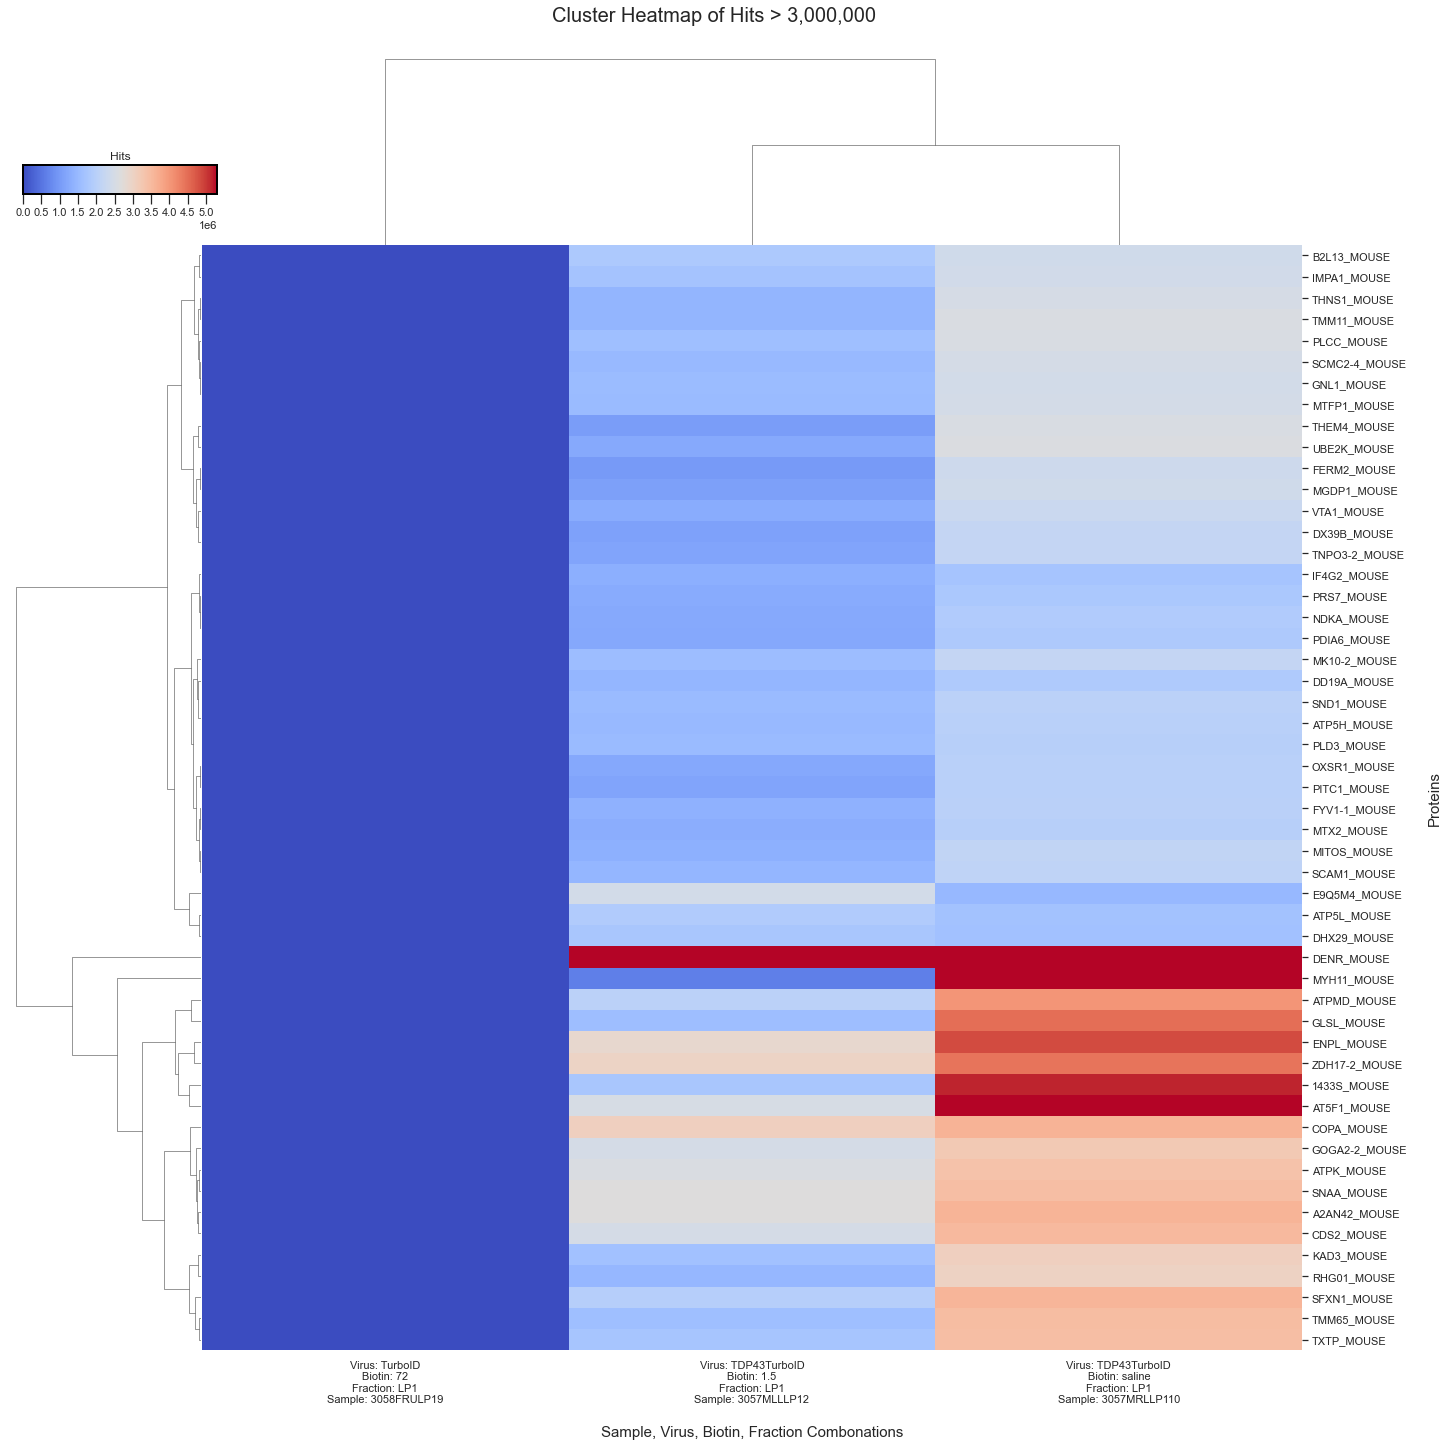

In [15]:
TurboID_72_LP1_3058FRULP19 = TurboID_72_LP1_3058FRULP19.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_15_LP1_3057MLLLP12 = TDP43TurboID_15_LP1_3057MLLLP12.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_saline_LP1_3057MRLLP110 = TDP43TurboID_saline_LP1_3057MRLLP110.copy().groupby("Protein_Name").mean().reset_index()

protein_TurboID = list(set(protein_finder(TurboID_72_LP1_3058FRULP19)))
protein_TDP43TurboID = list(set(protein_finder(TDP43TurboID_15_LP1_3057MLLLP12) + protein_finder(TDP43TurboID_saline_LP1_3057MRLLP110)))
proteins_non_unique = protein_TurboID + protein_TDP43TurboID
proteins_non_unique_remove = list(set([x for x in proteins_non_unique if proteins_non_unique.count(x) > 1]))

TurboID_72_LP1_3058FRULP19 = TurboID_72_LP1_3058FRULP19.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TurboID_72_LP1_3058FRULP19")})
TDP43TurboID_15_LP1_3057MLLLP12 = TDP43TurboID_15_LP1_3057MLLLP12.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_LP1_3057MLLLP12")})
TDP43TurboID_saline_LP1_3057MRLLP110 = TDP43TurboID_saline_LP1_3057MRLLP110.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_saline_LP1_3057MRLLP110")})

merge_df = TurboID_72_LP1_3058FRULP19.merge(TDP43TurboID_15_LP1_3057MLLLP12, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_saline_LP1_3057MRLLP110, how = "inner", on = "Protein_Name")

# remove non unqiue proteins 
# and remove unwanted proteins
protein_list = merge_df.Protein_Name.to_list()
remove_list = []
for i in range(len(protein_list)):
    if(protein_list[i] in proteins_non_unique_remove):
        remove_list.append(i)
    else:
        if(protein_list[i][0:3].upper() == "KRT"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ACTB"):
            remove_list.append(i)
        if(protein_list[i][0:6].upper() == "SERPIN"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ITIH"):
            remove_list.append(i)
        if(protein_list[i][0:3].upper() == "ALB"):
            remove_list.append(i)
    
merge_df = merge_df.drop(remove_list, axis = 0)

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')
print(len(merge_df))

 # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Chagne the limit to find different visuals
limit = 3_000_000

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]

x_labels_order = sorted(merge_filtered_df.columns)

print("Nummber of Proteins captured:", len(merge_filtered_df))
sns.set_theme(style='white')

kws = dict(cbar_kws=dict(ticks=[x for x in range(0, 10000000, 500000)], orientation='horizontal'), figsize=(20,20))

# Default plot
g = sns.clustermap(merge_filtered_df.reindex(x_labels_order, axis = 1), cmap='coolwarm',dendrogram_ratio = (0.15, 0.15), metric="euclidean", method = "ward",  **kws, robust = True)

g.fig.subplots_adjust( top = 0.95 )
g.fig.suptitle(f'Cluster Heatmap of Hits > {limit:,}', size = 20)
g.ax_heatmap.set_xlabel('\nSample, Virus, Biotin, Fraction Combonations', size = 15)
g.ax_heatmap.set_ylabel('\nProteins', size = 15)



x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.85, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('Hits')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Show the graph
plt.show()

---
## Sample, Virus, Biotin, Brain Fraction
#### 3057-MLL-LP1_2, TDP43-TurboID, 1.5, LP1
#### 3057-MLL-LS1_1, TDP43-TurboID, 1.5, LS1
#### 3057-MLL-NUC_3, TDP43-TurboID, 1.5, Nuclear
#### 3062-MRL_4, TDP43-TurboID, 1.5, whole brain


In [16]:
TDP43TurboID_15_LP1_3057MLLLP12 = main_df[main_df["Sample_Name"] == "3057-MLL-LP1_2"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]

TDP43TurboID_15_LP1_3057MLLLS11 = main_df[main_df["Sample_Name"] == "3057-MLL-LS1_1"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]

TDP43TurboID_15_nuclear_3057MLLNUC3 = main_df[main_df["Sample_Name"] == "3057-MLL-NUC_3"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "Nuclear"]

TDP43TurboID_15_wholebrain_3057MLLNUC3 = main_df[main_df["Sample_Name"] == "3062-MRL_4"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]

print(f"Check that all subsets have information\n1:{len(TDP43TurboID_15_LP1_3057MLLLP12)}, 2:{len(TDP43TurboID_15_LP1_3057MLLLS11)}, 3:{len(TDP43TurboID_15_nuclear_3057MLLNUC3)}, 4:{len(TDP43TurboID_15_wholebrain_3057MLLNUC3)}")

Check that all subsets have information
1:5883, 2:5883, 3:5883, 4:5883


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3584511820.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_LP1_3057MLLLP12 = main_df[main_df["Sample_Name"] == "3057-MLL-LP1_2"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3584511820.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_LP1_3057MLLLS11 = main_df[main_df["Sample_Name"] == "3057-MLL-LS1_1"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_13416\3584511820.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_15_nuclear_3057MLLNUC3 = main_df[main_df["Sample_Name"] == "3057-MLL-NUC_3"][main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_

## Cluster Heat Map

5871
Nummber of Proteins captured: 55


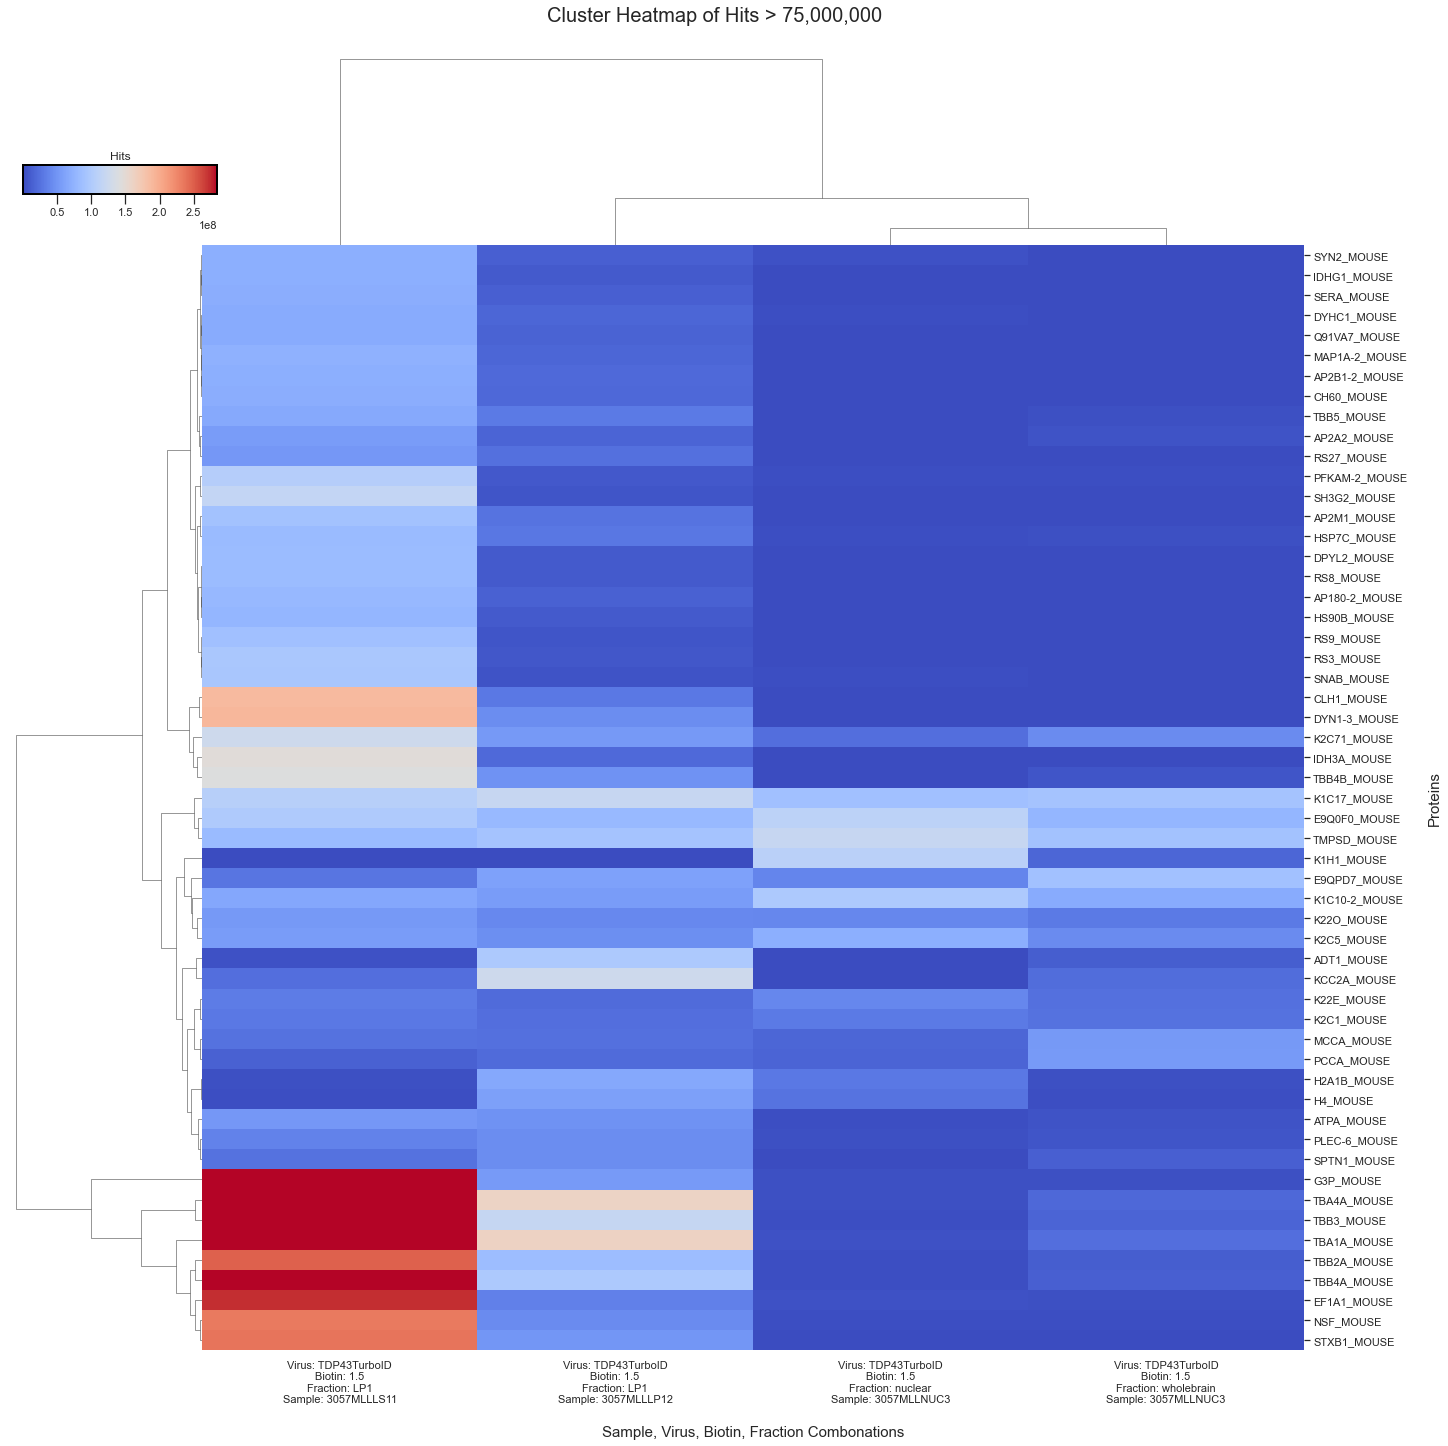

In [17]:
TDP43TurboID_15_LP1_3057MLLLP12 = TDP43TurboID_15_LP1_3057MLLLP12.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_15_LP1_3057MLLLS11 = TDP43TurboID_15_LP1_3057MLLLS11.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_15_nuclear_3057MLLNUC3 = TDP43TurboID_15_nuclear_3057MLLNUC3.copy().groupby("Protein_Name").mean().reset_index()
TDP43TurboID_15_wholebrain_3057MLLNUC3 = TDP43TurboID_15_wholebrain_3057MLLNUC3.copy().groupby("Protein_Name").mean().reset_index()

protein_TurboID = list(set())
protein_TDP43TurboID = list(set(protein_finder(TDP43TurboID_15_LP1_3057MLLLP12) + protein_finder(TDP43TurboID_15_LP1_3057MLLLS11) + protein_finder(TDP43TurboID_15_nuclear_3057MLLNUC3) + protein_finder(TDP43TurboID_15_wholebrain_3057MLLNUC3)))
proteins_non_unique = protein_TurboID + protein_TDP43TurboID
proteins_non_unique_remove = list(set([x for x in proteins_non_unique if proteins_non_unique.count(x) > 1]))

TDP43TurboID_15_LP1_3057MLLLP12 = TDP43TurboID_15_LP1_3057MLLLP12.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_LP1_3057MLLLP12")})
TDP43TurboID_15_LP1_3057MLLLS11 = TDP43TurboID_15_LP1_3057MLLLS11.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_LP1_3057MLLLS11")})
TDP43TurboID_15_nuclear_3057MLLNUC3 = TDP43TurboID_15_nuclear_3057MLLNUC3.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_nuclear_3057MLLNUC3")})
TDP43TurboID_15_wholebrain_3057MLLNUC3 = TDP43TurboID_15_wholebrain_3057MLLNUC3.copy()[["Protein_Name", "Hits"]].rename(columns = {"Hits": labeler("TDP43TurboID_15_wholebrain_3057MLLNUC3")})

merge_df = TDP43TurboID_15_LP1_3057MLLLP12.merge(TDP43TurboID_15_LP1_3057MLLLS11, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_15_nuclear_3057MLLNUC3, how = "inner", on = "Protein_Name")
merge_df = merge_df.merge(TDP43TurboID_15_wholebrain_3057MLLNUC3, how = "inner", on = "Protein_Name")

# remove non unqiue proteins 
# and remove unwanted proteins
protein_list = merge_df.Protein_Name.to_list()
remove_list = []
for i in range(len(protein_list)):
    if(protein_list[i] in proteins_non_unique_remove):
        remove_list.append(i)
    else:
        if(protein_list[i][0:3].upper() == "KRT"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ACTB"):
            remove_list.append(i)
        if(protein_list[i][0:6].upper() == "SERPIN"):
            remove_list.append(i)
        if(protein_list[i][0:4].upper() == "ITIH"):
            remove_list.append(i)
        if(protein_list[i][0:3].upper() == "ALB"):
            remove_list.append(i)
    
merge_df = merge_df.drop(remove_list, axis = 0)

merge_df["Protein_Name"] = merge_df.apply(lambda x : x["Protein_Name"].split(";")[0] if len(x["Protein_Name"].split(";")) != 1 else x["Protein_Name"], axis = 1)
merge_df = merge_df.set_index('Protein_Name')
print(len(merge_df))

 # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Chagne the limit to find different visuals
limit = 75_000_000

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

merge_filtered_df = merge_df[(merge_df.sum(axis=1) > limit)]

x_labels_order = sorted(merge_filtered_df.columns)

print("Nummber of Proteins captured:", len(merge_filtered_df))
sns.set_theme(style='white')

kws = dict(cbar_kws=dict(ticks=[x for x in range(0, 1000000000, 50000000)], orientation='horizontal'), figsize=(20,20))

# Default plot
g = sns.clustermap(merge_filtered_df.reindex(x_labels_order, axis = 1), cmap='coolwarm',dendrogram_ratio = (0.15, 0.15), metric="euclidean", method = "ward",  **kws, robust = True)

g.fig.subplots_adjust( top = 0.95 )
g.fig.suptitle(f'Cluster Heatmap of Hits > {limit:,}', size = 20)
g.ax_heatmap.set_xlabel('\nSample, Virus, Biotin, Fraction Combonations', size = 15)
g.ax_heatmap.set_ylabel('\nProteins', size = 15)



x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.85, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('Hits')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('black')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Show the graph
plt.show()